In [16]:
import pandas as pd
from sqlalchemy import create_engine, text
!pip install mysqlclient

In [8]:
import pandas as pd

# Specify the path to your CSV file
file_path = '/content/webscrapedata.csv'

# Read the CSV file into a DataFrame
source_csv_df = pd.read_csv(file_path)

# Display the DataFrame
print(source_csv_df)


          Date  Revenue (Millions of US $)  Net Income (Millions of US $)
0   2023-12-31                      119575                          33916
1   2023-09-30                       89498                          22956
2   2023-06-30                       81797                          19881
3   2023-03-31                       94836                          24160
4   2022-12-31                      117154                          29998
5   2022-09-30                       90146                          20721
6   2022-06-30                       82959                          19442
7   2022-03-31                       97278                          25010
8   2021-12-31                      123945                          34630
9   2021-09-30                       83360                          20551
10  2021-06-30                       81434                          21744
11  2021-03-31                       89584                          23630
12  2020-12-31                      11

In [9]:
raw_host = "sqlproject.c5acwaqw021i.us-east-2.rds.amazonaws.com"
raw_username = "jonahwoo"
raw_password = "isba4715"
raw_schema = "sql_project"

raw_db_config = {
    "host": raw_host,
    "username": raw_username,
    "password": raw_password,
    "schema": raw_schema
}

raw_engine = create_engine(f"mysql+mysqldb://{raw_db_config['username']}:{raw_db_config['password']}@{raw_db_config['host']}/{raw_db_config['schema']}")

In [10]:
raw_table = "raw_Apple_Data"
source_csv_df.to_sql(raw_table, raw_engine, index=False, if_exists="append")

60

## DESCRIPTIVE ANALYTICS BUSINESS QUESTION

What is apple's profit margin per quarter ?

In [19]:
raw_query = text(f'''
SELECT
    Date,
    (`Net Income (Millions of US $)` / `Revenue (Millions of US $)`) * 100 AS net_profit_margin
FROM
    {raw_table};
''')
raw_df = pd.read_sql(raw_query, raw_engine)

In [20]:
## sql results
raw_df

,Date,net_profit_margin
0,2023-12-31,28.3638
1,2023-09-30,25.6497
2,2023-06-30,24.3053
3,2023-03-31,25.4756
4,2022-12-31,25.6056
...,...,...
115,2010-03-31,22.7721
116,2009-12-31,21.5392
117,2009-09-30,20.7422
118,2009-06-30,18.7795


from matplotlib import pyplot as plt
raw_df['net_profit_margin'].plot(kind='hist', bins=20, title='net_profit_margin')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['net_profit_margin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = raw_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('net_profit_margin')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = raw_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
raw_df['net_profit_margin'].plot(kind='line', figsize=(8, 4), title='net_profit_margin')
plt.gca().spines[['top', 'right']].set_visible(False)

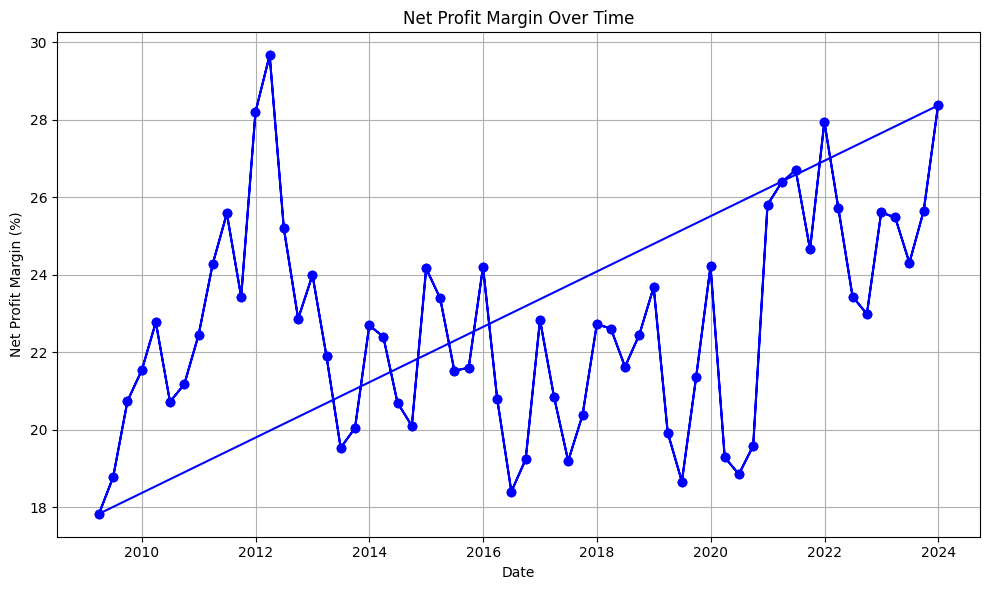

In [27]:
from matplotlib import pyplot as plt

# Assuming raw_df is your DataFrame with the index containing date values

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(raw_df.index, raw_df['net_profit_margin'], color='blue', marker='o', linestyle='-')

# Title and labels
plt.title('Net Profit Margin Over Time')
plt.xlabel('Date')
plt.ylabel('Net Profit Margin (%)')

# Grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


## INSIGHTS



The net profit margin for the last quarter of 2023 is currently the second highest since 2009.



## RECOMMENDATION

Apple has been minimizing its spending costs while maximing profits well, so should be a safe stock to invest in for the long run.

## PREDICTION

While the net profit margin may drop a bit from past trends, the overall trend of it should continue to slowly go up.

## DIAGNOSTIC ANALYTICS BUSINESS QUESTION

How does the net profit margin for each quarter compare to the average over the last 14 years?

In [47]:
## sql code

raw_query = text(f'''
WITH avg_net_profit_margin AS (
    SELECT
        Date,
        `Net Income (Millions of US $)` / `Revenue (Millions of US $)` * 100 AS net_profit_margin,
        AVG(`Net Income (Millions of US $)` / `Revenue (Millions of US $)`) OVER () * 100 AS avg_net_profit_margin
    FROM
        {raw_table}
)
SELECT
    Date,
    net_profit_margin,
    avg_net_profit_margin,
    CASE
        WHEN net_profit_margin > avg_net_profit_margin THEN 'Above Average'
        WHEN net_profit_margin < avg_net_profit_margin THEN 'Below Average'
        ELSE 'Equal to Average'
    END AS comparison
FROM
    avg_net_profit_margin;

''')

raw_df = pd.read_sql(raw_query, raw_engine)

In [48]:
## sql results

raw_df

,Date,net_profit_margin,avg_net_profit_margin,comparison
0,2023-12-31,28.3638,22.686667,Above Average
1,2023-09-30,25.6497,22.686667,Above Average
2,2023-06-30,24.3053,22.686667,Above Average
3,2023-03-31,25.4756,22.686667,Above Average
4,2022-12-31,25.6056,22.686667,Above Average
...,...,...,...,...
115,2010-03-31,22.7721,22.686667,Above Average
116,2009-12-31,21.5392,22.686667,Below Average
117,2009-09-30,20.7422,22.686667,Below Average
118,2009-06-30,18.7795,22.686667,Below Average


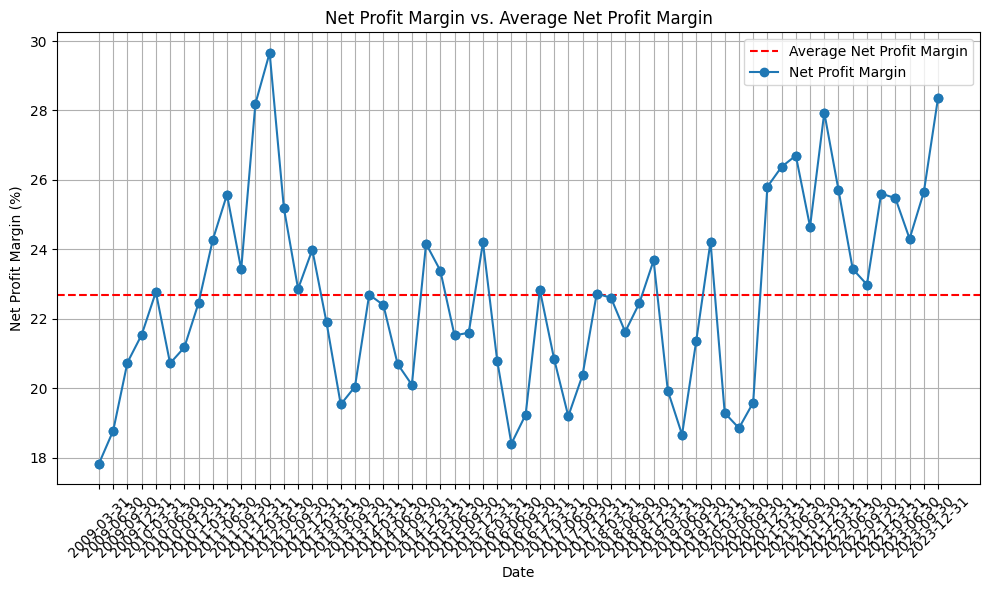

In [51]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'Date' column in ascending order
raw_df_sorted = raw_df.sort_values(by='Date')

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the average net profit margin as a horizontal line
plt.axhline(y=raw_df_sorted['avg_net_profit_margin'].iloc[0], color='red', linestyle='--', label='Average Net Profit Margin')

# Plotting the net profit margin as a time series
plt.plot(raw_df_sorted['Date'], raw_df_sorted['net_profit_margin'], marker='o', linestyle='-', label='Net Profit Margin')

# Formatting
plt.title('Net Profit Margin vs. Average Net Profit Margin')
plt.xlabel('Date')
plt.ylabel('Net Profit Margin (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## INSIGHTS

From 2009-2020, the net profit margin would dip below and go above the average inconsistently, but the profit margin since 2020 has all been above the average margin.

## RECOMMENDATIONS

Apple has consistently been beating its 14 year average in performance, so they are a strong and safe company for long term investors.

## PREDICTION

They will consistently continue to beat their historical average, although there may be a few outlier quarters here and there.